In [1]:
from helpers import *
from lstmHelpers import *

import random
from random import randrange, shuffle
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
import time
from collections import deque


filedir = "../"

Using TensorFlow backend.


In [2]:
## WRITE STREAM DATA TO FILE
start = time.time()
total_time = time.time()

NUM_CLASSES_OVERRIDE = 50  # If 0, use ALL classes; else, use n classes only
num_files_in_stream = 30 * NUM_CLASSES_OVERRIDE
order_to_use = []

used_classes, unused_classes = load_classes(filedir, NUM_CLASSES_OVERRIDE, display=False)

for i in range(NUM_CLASSES_OVERRIDE):
    order_to_use.extend([i] * int(num_files_in_stream / NUM_CLASSES_OVERRIDE))
    
shuffle(order_to_use)
generate_data_file("trainingInfo.txt", filedir, used_classes, unused_classes, order_to_use)
shuffle(order_to_use)
generate_data_file("testingInfo.txt", filedir, used_classes, unused_classes, order_to_use)

# code you want to evaluate
end = time.time()
print("Time elapsed: " + str(end-start) + " seconds, or " + str((end-start)/60.0) + " minutes")

Using classes...
Exact Classes: [6061, 8223, 9480, 3257, 8145, 4437, 490, 9770, 8353, 6530, 1894, 3593, 6976, 9595, 2145, 578, 8398, 2387, 2716, 1908, 1613, 5345, 9606, 760, 3842, 6174, 6613, 4208, 8585, 8057, 5494, 7518, 1113]
Matched Classes: [2699, 2221, 1382, 95, 1894, 4179, 1498, 2386, 36, 3446, 1391, 217, 3533, 1545, 1182, 721, 1852]


Time elapsed: 0.014337301254272461 seconds, or 0.00023895502090454102 minutes


In [12]:
## READ STREAM DATA FROM FILE

def load_stream(name, filedir='../'):
    training_file = open(filedir + name, "r")
    info = training_file.read().split('\n')
    data_matrix = []
    for inf in info:
        segs = inf.split('-_-')
        if len(segs) > 1:
            try:
                data_matrix.append([segs[0].strip(), segs[1].strip(), segs[2].strip()])
            except Exception as e:
                #print(e)
                print(inf)
        else:
            print("\nBlank Segment at File Start")
    training_file.close()
    return data_matrix

def generate_composite_stream(audio_matrix, data_dict = None):
    cur_percentage = 0
    if data_dict == None:
        data_dict = {}
    
    composite_signal_list = []
    composite_matches_list = []
    
    for i in range(len(audio_matrix)):
        if (round(i / len(audio_matrix) * 100) != cur_percentage):
            cur_percentage = round(i / len(audio_matrix) * 100)
            print(str(cur_percentage) + "%     ", end='')
            
        filename = audio_matrix[i][2]
        if filename in data_dict:
            y = data_dict.get(filename)
        else:
            yt,sr = librosa.load(filename)
            y, idx = librosa.effects.trim(yt, top_db=50)
            data_dict[filename] = y
        composite_signal_list.append(y)
        composite_matches_list.append(np.full(y.shape, audio_matrix[i][1]))
    composite_signal = np.array(composite_signal_list)
    composite_signal = np.concatenate(composite_signal).ravel()
    composite_matches = np.array(composite_matches_list)
    composite_matches = np.concatenate(composite_matches).ravel()
    return composite_signal, composite_matches, data_dict
    
start = time.time()

audio_matrix = load_stream(name="trainingInfo.txt")
composite_signal, composite_matches, preloaded_data = generate_composite_stream(audio_matrix)
audio_matrix_test = load_stream(name="testingInfo.txt")
composite_signal_test, composite_matches_test, x = generate_composite_stream(audio_matrix_test, data_dict=preloaded_data)

composite_matches 

end = time.time()
print("\nTime elapsed: " + str(end-start) + " seconds, or " + str((end-start)/60.0) + " minutes")


Blank Segment at File Start
1%     2%     3%     4%     5%     6%     7%     8%     9%     10%     11%     12%     13%     14%     15%     16%     17%     18%     19%     20%     21%     22%     23%     24%     25%     26%     27%     28%     29%     30%     31%     32%     33%     34%     35%     36%     37%     38%     39%     40%     41%     42%     43%     44%     45%     46%     47%     48%     49%     50%     51%     52%     53%     54%     55%     56%     57%     58%     59%     60%     61%     62%     63%     64%     65%     66%     67%     68%     69%     70%     71%     72%     73%     74%     75%     76%     77%     78%     79%     80%     81%     82%     83%     84%     85%     86%     87%     88%     89%     90%     91%     92%     93%     94%     95%     96%     97%     98%     99%     100%     
Blank Segment at File Start
1%     2%     3%     4%     5%     6%     7%     8%     9%     10%     11%     12%     13%     14%     15%     16%     17%     18%     19%     20%    

Training Data
1%     2%     3%     4%     5%     6%     7%     8%     9%     10%     11%     12%     13%     14%     15%     16%     17%     18%     19%     20%     21%     22%     23%     24%     25%     26%     27%     28%     29%     30%     31%     32%     33%     34%     35%     36%     37%     38%     39%     40%     41%     42%     43%     44%     45%     46%     47%     48%     49%     50%     51%     52%     53%     54%     55%     56%     57%     58%     59%     60%     61%     62%     63%     64%     65%     66%     67%     68%     69%     70%     71%     72%     73%     74%     75%     76%     77%     78%     79%     80%     81%     82%     83%     84%     85%     86%     87%     88%     89%     90%     91%     92%     93%     94%     95%     96%     97%     98%     99%     100%     
Testing Data
1%     2%     3%     4%     5%     6%     7%     8%     9%     10%     11%     12%     13%     14%     15%     16%     17%     18%     19%     20%     21%     22%     23%     24%  

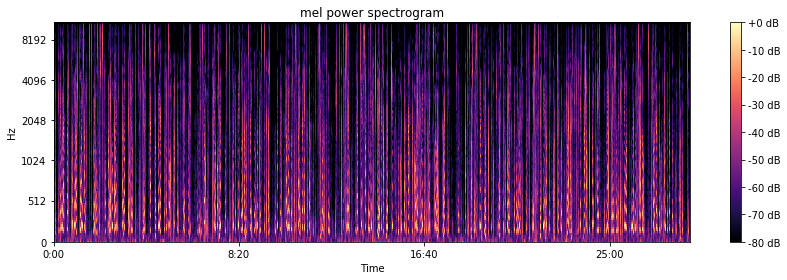

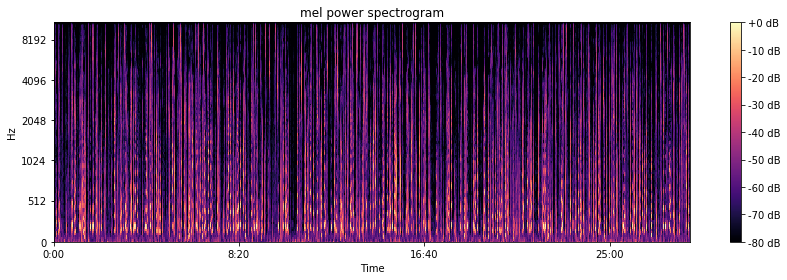

In [4]:
start = time.time()
n_mels = 128
batch_length = 20

def batch(signal, matches):
    # Generate batched data list for signal/matches
    
    data = []
    classes = []
    spec = get_spectrogram(signal, 22050, n_mels=n_mels)
    cur_col = 0
    transposed = spec.T
    scaler = MinMaxScaler(feature_range=(0, 1))
    transposed = scaler.fit_transform(transposed)
    cur_percentage = 0
    for col in transposed:
        if cur_col + batch_length >= len(transposed):
            break
        if (round(cur_col / len(transposed) * 100) != cur_percentage):
            cur_percentage = round(cur_col / len(transposed) * 100)
            print(str(cur_percentage) + "%     ", end='')
        comp_cols = [col]
        for i in range(1,batch_length):
            comp_cols.append(transposed[cur_col + i])
        data.append(comp_cols)
        classes.append(int(matches[int(cur_col / len(transposed) * len(matches))]))
        cur_col += 1
    return data, classes

print("Training Data")
training_data, training_classes = batch(composite_signal, composite_matches)
print("\nTesting Data")
testing_data, testing_classes = batch(composite_signal_test, composite_matches_test)
print()
max_spec_length = len(training_data[0])
print()
training_data = np.array(training_data)
testing_data = np.array(testing_data)

end = time.time()
print("Time elapsed: " + str(end-start) + " seconds, or " + str((end-start)/60.0) + " minutes")

In [5]:
# Make/test the LSTM

lstm_out = 200
batch_size = 64
embedding_vector_length = 32
dropout = 0.2
dropout_r = 0.2

number_inputs = NUM_CLASSES_OVERRIDE

print(str(number_inputs) + " " + str(embedding_vector_length) + " " + str(len(training_data[0])) + " " + str(dropout) + 
      " " + str(lstm_out) + " " + str(dropout_r) + " " + str(NUM_CLASSES_OVERRIDE))
    
model = Sequential()
model.add(LSTM(lstm_out, input_shape=(batch_length, n_mels), dropout = dropout, recurrent_dropout = dropout_r))
model.add(Dense(NUM_CLASSES_OVERRIDE,activation='softmax'))  #softmax
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])  # sparse_categorical_crossentropy
print(model.summary())

model.fit(training_data, training_classes, epochs=3, batch_size=batch_size)
scores = model.evaluate(testing_data, testing_classes)
print("Accuracy: %.2f%%" % (scores[1]*100))

total_end = time.time()
print("Total Time elapsed: " + str((total_end-total_time)/60.0) + " minutes")

50 32 20 0.2 200 0.2 50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               263200    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                10050     
Total params: 273,250
Trainable params: 273,250
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
73977/73977 [==============================] - 22s 299us/step - loss: 1.6035 - acc: 0.5501
Epoch 2/3
73977/73977 [==============================] - 20s 272us/step - loss: 0.5372 - acc: 0.8529
Epoch 3/3
73977/73977 [==============================] - 16s 212us/step
Accuracy: 94.52%
Total Time elapsed: 1.9098694523175557 minutes
